## Using entropy to detect substructures in the pieces

In [47]:
from wavescapes import *
from glob import glob
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import antropy as ent

In [39]:
scores = glob('./scores/*.mid')

def compute_magnitude_entropy(score, ver_ratio=0.2, hor_ratio=(0,1), aw_size=4):
    arr1 = produce_pitch_class_matrix_from_filename(score, aw_size=aw_size)
    utm = np.abs(apply_dft_to_pitch_class_matrix(arr1))
    vec = []
    for i in range(7):
        vec.append(utm[int(utm.shape[0] * ver_ratio)-1,:,i][utm[int(utm.shape[0] * ver_ratio)-1,:,i] != 0])
    sel = np.array([ve[int(utm.shape[1] * hor_ratio[0]):int(utm.shape[1] * hor_ratio[1])] for ve in vec])
    entr = ent.spectral_entropy(sel, 1, method='fft')
    return entr[1:]

In [41]:
entropies_1 = {}
for score in scores:
    try:
        entropies_1[score] = compute_entropy(score, ver_ratio=0.1)
    except:
        print('could not load file')

could not load file


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\antropy\entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\antropy\entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)


In [44]:
entropies_8 = {}
for score in scores:
    try:
        entropies_8[score] = compute_entropy(score, ver_ratio=0.8)
    except:
        print('could not load file')

could not load file


Text(0.5, 1.0, 'entropies')

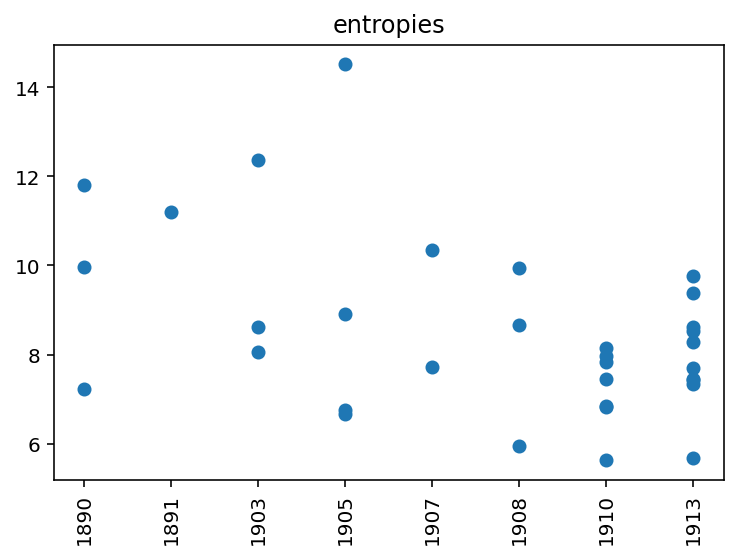

In [46]:
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1)
plt.scatter([name.split('\\')[-1][:4] for name in entropies_8.keys()], [val.sum() for val in entropies_8.values()])
plt.xticks(rotation=90)
plt.title('entropies')

Text(0.5, 1.0, 'entropies 5th coeff')

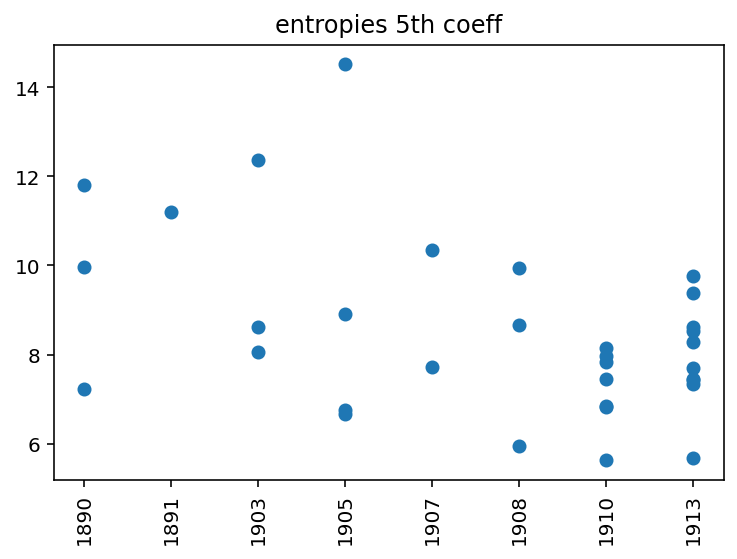

In [51]:
plt.scatter([name.split('\\')[-1][:4] for name in entropies_8.keys()], [val.sum() for val in entropies_8.values()])
plt.xticks(rotation=90)
plt.title('entropies 5th coeff')

In [49]:
entropies_1 = {}
for score in scores:
    try:
        entropies_1[score] = compute_entropy(score, ver_ratio=0.05)
    except:
        print('could not load file')

could not load file


<ipython-input-39-81626824c889>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sel = np.array([ve[int(utm.shape[1] * hor_ratio[0]):int(utm.shape[1] * hor_ratio[1])] for ve in vec])


could not load file
could not load file
could not load file
could not load file


Text(0.5, 1.0, 'entropies 5th coeff')

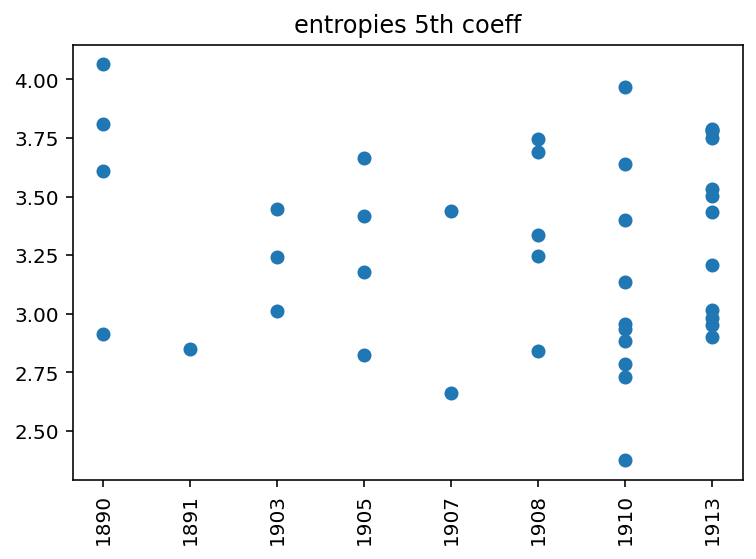

In [50]:
plt.scatter([name.split('\\')[-1][:4] for name in entropies_1.keys()], [val[4] for val in entropies_1.values()])
plt.xticks(rotation=90)
plt.title('entropies 5th coeff')

In [71]:
def compute_magnitudes(score, ver_ratio=0.2, hor_ratio=(0,1), aw_size=4):
    arr1 = produce_pitch_class_matrix_from_filename(score, aw_size=aw_size)
    utm = np.abs(apply_dft_to_pitch_class_matrix(arr1))
    vec = []
    for i in range(7):
        vec.append(utm[int(utm.shape[0] * ver_ratio)-1,:,i][utm[int(utm.shape[0] * ver_ratio)-1,:,i] != 0])
    sel = np.array([ve[int(utm.shape[1] * hor_ratio[0]):int(utm.shape[1] * hor_ratio[1])] for ve in vec])
    return sel[4]

In [73]:
magnitudes = {}
for score in scores:
    try:
        magnitudes[score] = compute_magnitudes(score, ver_ratio=0.05)
    except:
        print('could not load file')

could not load file


<ipython-input-71-2b7e312326ab>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sel = np.array([ve[int(utm.shape[1] * hor_ratio[0]):int(utm.shape[1] * hor_ratio[1])] for ve in vec])


In [74]:
def compute_peaks(score, ver_ratio=0.2, hor_ratio=(0,1), aw_size=4):
    arr1 = produce_pitch_class_matrix_from_filename(score, aw_size=aw_size)
    utm = np.abs(apply_dft_to_pitch_class_matrix(arr1))
    vec = []
    for i in range(7):
        vec.append(utm[int(utm.shape[0] * ver_ratio)-1,:,i][utm[int(utm.shape[0] * ver_ratio)-1,:,i] != 0])
    sel = [ve[int(utm.shape[1] * hor_ratio[0]):int(utm.shape[1] * hor_ratio[1])] for ve in vec]
    return [len(find_peaks(list(magnitudes))[0]) for magnitudes in sel]

In [75]:
peaks = {}
for score in scores:
    #peaks[score] = compute_peaks(score, ver_ratio=0.05)
    try:
        peaks[score] = compute_peaks(score, ver_ratio=0.05)
    except:
        print('could not load file')

could not load file


In [70]:
peaks

{'./scores\\1890Debussy_-_Suite_Bergamasque_-_I._Prelude.mid': [18,
  21,
  18,
  25,
  17,
  22,
  24],
 './scores\\1890Debussy_-_Suite_Bergamasque_-_II._Menuet.mid': [12,
  20,
  18,
  17,
  19,
  14,
  17],
 './scores\\1890Debussy_-_Suite_Bergamasque_-_III._Clair_de_Lune.mid': [10,
  21,
  16,
  13,
  19,
  15,
  23],
 './scores\\1890Debussy_-_Suite_Bergamasque_-_VI._Passepied.mid': [27,
  35,
  36,
  29,
  33,
  30,
  29],
 './scores\\1891premiere_arabesque.mid': [14, 28, 32, 24, 26, 19, 28],
 './scores\\1903debussy_estampes_1_(c)galimberti.mid': [9,
  18,
  19,
  20,
  23,
  13,
  20],
 './scores\\1903estamp2_La soirée_dans_Grenade.mid': [29,
  39,
  35,
  26,
  29,
  31,
  28],
 './scores\\1903estamp3_Jardins_sous_la_pluie.mid': [20,
  19,
  24,
  21,
  19,
  21,
  20],
 './scores\\1905estamp1_Pagodes.mid': [30, 29, 25, 31, 27, 32, 26],
 './scores\\1905images_1_1_(c)oguri.mid': [32, 36, 31, 31, 32, 25, 27],
 './scores\\1905images_1_2_(c)oguri.mid': [40, 44, 33, 33, 40, 34, 38],
 

Text(0.5, 1.0, 'Number of peaks')

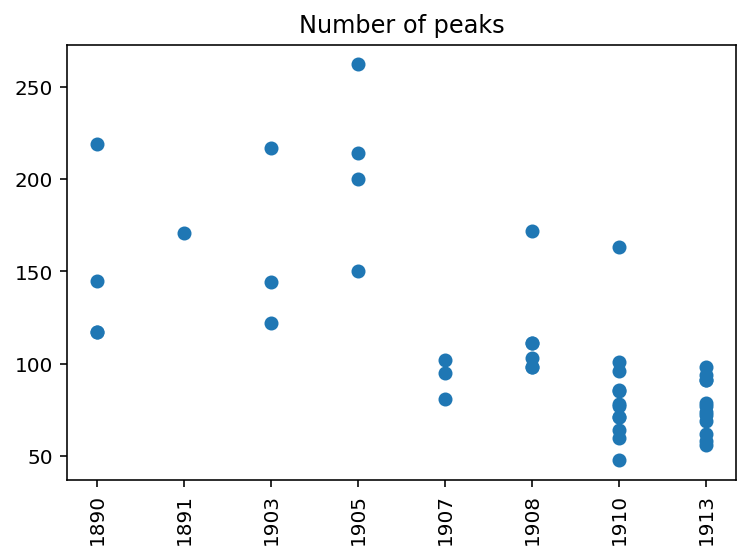

In [59]:
plt.scatter([name.split('\\')[-1][:4] for name in peaks.keys()], [np.array(val).sum() for val in peaks.values()])
plt.xticks(rotation=90)
plt.title('Number of peaks')

In [71]:
magnitudes

{'./scores\\1890Debussy_-_Suite_Bergamasque_-_I._Prelude.mid': array([ 3.65528537,  0.87002554,  2.63391344,  8.59869176, 13.51105514,
        10.78804637, 10.44163674,  5.56464534,  6.72216483,  8.05838073,
        13.31352696, 13.51619399, 14.00669483,  7.36121593,  9.68568531,
         2.64575131,  7.7741559 ,  8.91978139, 16.57705074,  4.81822351,
         4.67558671,  2.12785756,  6.17341973,  8.03507934,  2.59807621,
         5.48292805,  9.64689069, 13.17905535, 13.59227722, 22.52914779,
        32.22199473, 32.58013625, 27.85727513, 17.46564087, 10.46057413,
         3.82517247,  3.863109  ,  6.54843069,  8.19086551,  8.67987775,
         8.11035004,  2.40370085,  3.92905841,  4.76969601,  8.59869176,
        20.81615959, 24.5344146 , 35.52375965, 25.72450194,  4.71330858,
         7.45029828, 26.60761691, 29.26044448,  9.63644702, 22.47421362,
        19.84313483, 23.57567602, 27.10742518, 29.24145174, 46.00815145,
        40.44517895, 21.82744832, 23.34389642, 12.88113392, 10

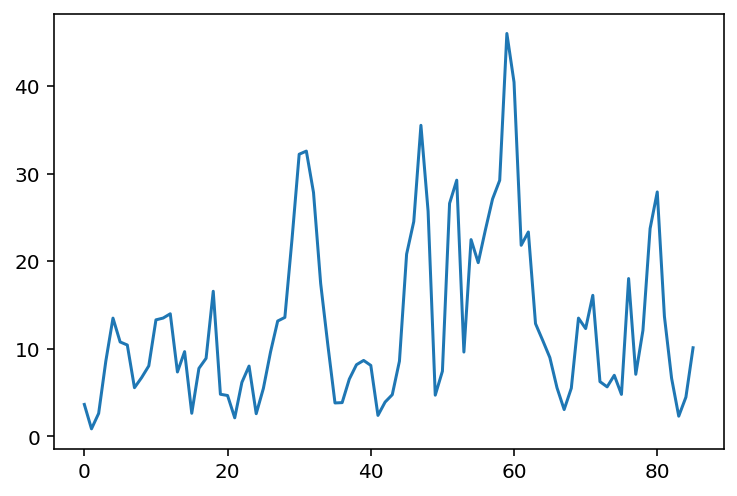

In [72]:
plt.plot(list(magnitudes.values())[0])

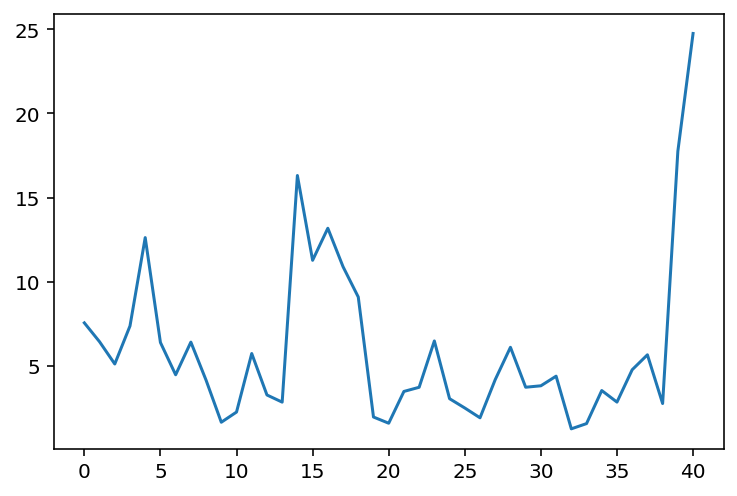

In [73]:
plt.plot(list(magnitudes.values())[-1])

In [66]:
from scipy.signal import find_peaks
len(find_peaks(list(magnitudes.values())[0])[0])

NameError: name 'magnitudes' is not defined

In [56]:
def compute_entropy_phase(score, ver_ratio=0.2, hor_ratio=(0,1), aw_size=4):
    arr1 = produce_pitch_class_matrix_from_filename(score, aw_size=aw_size)
    utm = np.round(np.angle(apply_dft_to_pitch_class_matrix(arr1)), 2)
    vec = []
    coeffs = []
    height = int(utm.shape[0] * ver_ratio)-1
    sel = np.array(utm[height,:,:]).T
    entr = ent.spectral_entropy(sel, 1, method='fft')
    return entr[1:]

In [58]:
entropies_phase = {}
for score in scores:
    #entropies_phase[score] = compute_entropy_phase(score, ver_ratio=0.1)
    try:
        entropies_phase[score] = compute_entropy_phase(score, ver_ratio=0.1)
    except:
        print('could not load file')

could not load file


Text(0.5, 1.0, 'entropies 5th coeff phases')

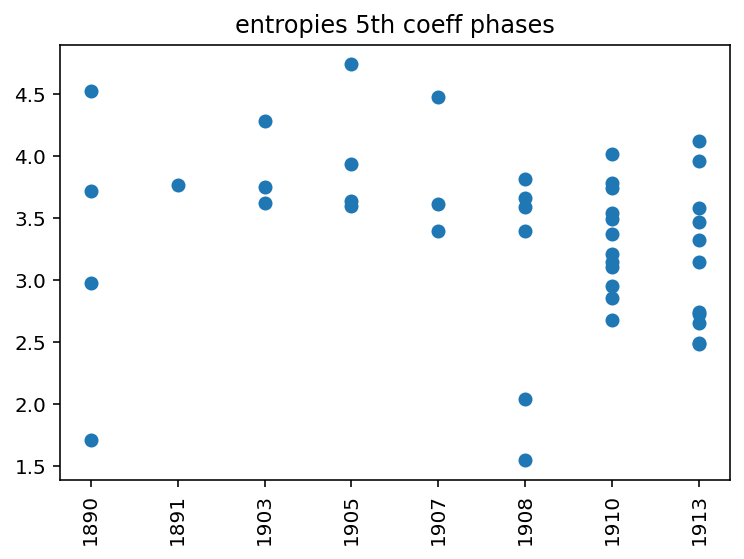

In [61]:
plt.scatter([name.split('\\')[-1][:4] for name in entropies_phase.keys()], [val[4] for val in entropies_phase.values()])
plt.xticks(rotation=90)
plt.title('entropies 5th coeff phases')